# Generación automática de cercha tipo Viga en Celosía

## 1. Librerías

In [10]:
# Ubicación de la carpeta 'struktura'
import sys
sys.path.append(r"C:\Users\fgrv\OneDrive\Documentos\PythonProjects\struktura")

# Módulo para generación automática de estructuras
# (por ahora solo viga en celosía)
import analisa.struct_gen as sg

## 2. Parámetros de la estructura

Se utiliza el módulo *struct_gen* y el constructor *LatticeBeam* cuyos parámetros son (entre paréntesis los valores por defecto):

- a: Lado horizontal izquierdo de la cabriada (10)
- b: Lado horizontal derecho de la cabriada (10)
- nL: Número de divisiones en el lado izquierdo (2)
- nr: Número de divisiones en el lado derecho (3)
- dL: Altura de la cabriada en el lado izquierdo (1)
- dr: Altura de la cabriada en el lado derecho (1)
- hL: Altura del apoyo izquierdo (0)
- hm: Altura de la parte superior de la cabriada (cumbrera) (2)
- hr: Altura del apoyo derecho (0)
- long_mat: Número asignado al material utilizado en los cordones longitudinales (1)
- long_sec: Número asignado al tipo de sección para los cordones longitudinales (1)
- diag_mat: Número para el material de las diagonales (1)
- diag_sec: Número para el tipo de perfil de las diagonales (1)
- sup_vert_load: Carga vertical de superficie (1)
- trus_sep: Separación entre cabriadas (distancia entre cabriadas) (5)
- nod_dist_purlins: Distancia entre correas en términos de cantidad de nudos (1)

Supongamos queremos generar una celosía americana a dos aguas, simétrica, de $20 m$ de luz, con una pendiente de techo de $15 \%$, con 10 divisiones a cada lado (11 nudos), con altura de la cabriada igual a $1 m$ a cada lado.

Atendiendo el dato de la pendiente, la altura de la cumbrera relativa a los apoyos será:
$$ h_m = pendiente \times a  $$

In [11]:
a = 10  # m
pendiente = 0.15
hm = pendiente * a

## 3. Generación de la estructura

Primero instanciamos la clase *LatticeBeam* introduciendo los parámetros mencionados precedentemente.

In [12]:
cab = sg.LatticeBeam(a=a, b=a, nL=10, nr=10, dL=1, dr=1, hm=hm)

Luego, se ejecutan los cálculos para la generación de la estructura, usando el método *builder()*

In [13]:
cab.builder()

Visualizamos la estructura con el método *plot()*

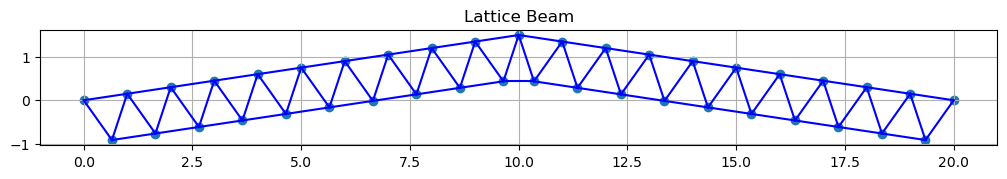

In [14]:
cab.plot()

Si se desea visualizar la enumeración de los nudos para posteriores análisis, se hace:

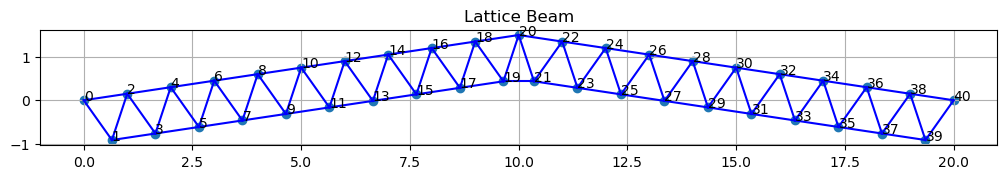

In [15]:
cab.plot(node_numbering=True)

## 4. Generación de cargas nodales

Se pueden generar cargas nodales, en los nudos de apoyo de las correaas. Con el desarrollo actual se pueden generar solo cargas nodales verticales. Los datos adicionales a proveer son:
- El valor de la carga vertical uniformemente distribuida en la superficie;
- La separación de las correas en términos de cantidad de nudos, por ejemplo, si las correas estarán apoyadas en todos los nudos superiores, este dato es igual a 1, si estarán a apoyadas en nudos alternados, será igual a 2, etc.

Supongamos, para este ejemplo, que la carga superificial uniforme es:
- $q = -1000 \, N/m^2$  (positivo hacia arriba, negativo hacia abajo)

y que las correas estarán apoyadas en nudos intercalados:
- $s = 2$

In [16]:
q = -1000  # Carga superficial
s = 2  # Separación de cabriadas (cada 2 nudos)

# Se agrega a los parámetros de la cabriada anterior
cab.sur_vert_load = q
cab.nod_dist_purlins = s

Volvemos a realizar los cálculos con *builder()*

In [17]:
cab.builder()

Las cargas nodales se muestran en un diccionario de *python*, en donde las *claves* son los números asignados a los nudos, y los *valores*, las cargas nodales en dirección $x$ e $y$.
Los resoltados se visualizan con el atributo *vloads*

In [18]:
cab.vloads

{0: (0, -5000.0),
 4: (0, -10000.0),
 8: (0, -10000.0),
 12: (0, -10000.0),
 16: (0, -20000.0),
 24: (0, -10000.0),
 28: (0, -10000.0),
 32: (0, -10000.0),
 36: (0, -10000.0),
 40: (0, -5000.0)}

Observar que, efectivamente, las cargas están asignadas a nudos intercalados del cordón superior. Por supuesto, esta asignación de cargas se podía haber hecho desde el principio.